In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso,LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [22]:
def plot(df):
    plt.scatter(df[df.columns[0]],y,c='g')
    plt.xlabel('X')
    plt.ylabel("Y")
    

In [23]:
def poly_features(df,deg):
    df_poly=df.copy()
    if(len(df_poly.shape)==1):
        df_poly=np.array(df_poly).reshape(-1,1)
    if(len(df)==1):
        df_poly=np.array(df_poly).reshape(1,-1)
    poly = PolynomialFeatures(deg)
    df_poly=poly.fit_transform(df_poly)
    return(df_poly)

In [33]:
import operator
def plot_predictions(df,model,deg):
    plot(df)
    x_test = np.array([np.random.random() for i in range(200)])
    y_pred=model.predict(poly_features(x_test,deg))
    sort_zip = sorted(zip(x_test,y_pred))
    a,b=zip(*sort_zip)
    plt.plot(a,b)
    plt.axis([0,1,-2.0,2])
    

In [25]:
def lasso_regression(df,deg,l2_val,y):
    df=poly_features(df['X'],deg)
    folds=KFold(10)
    
    l2_penalty_mse=[]
    best_mse=None
    best_l2=None
    best_model=None
    
    for l2 in l2_val:
        mse=0
        for train,test in folds.split(df):
            lasso=Lasso(l2)
            model=lasso.fit(df[train],y[train])
            y_pred=model.predict(df[test])
            mse+=np.sum((y[test]-y_pred)**2)
            
        mse/=10
        l2_penalty_mse.append(mse)
        if (best_mse==None or mse < best_mse):
            best_mse=mse
            best_l2=l2
            best_model=model
    return(l2_penalty_mse,best_l2,best_model)
        
    

In [26]:
x= np.array([np.random.random() for i in range(50)])
y=[np.sin(4*a)for a in x]


In [27]:
noise = np.random.normal(0,1/20,50)
y+=noise
df=pd.DataFrame({'X':x,'Y':y})

In [28]:
df

,X,Y
0,0.653518,0.441097
1,0.246859,0.833503
2,0.783570,0.057127
3,0.830415,-0.163931
4,0.776372,0.005230
5,0.906040,-0.399604
6,0.294233,0.903416
7,0.216569,0.738168
8,0.749857,0.136017
9,0.308379,1.007698


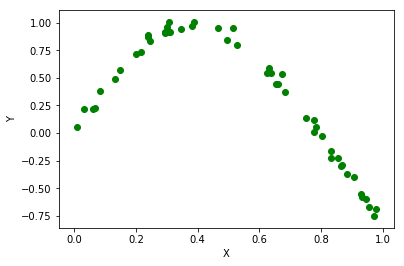

In [29]:
plot(df)

In [30]:
val=np.logspace(-4,15,num=10)
l2_penalty,l2,model=lasso_regression(df,16,val,df['Y'])

C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_

In [31]:
l2

0.0001

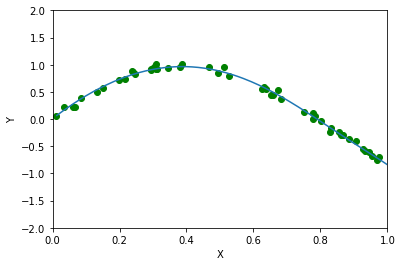

In [34]:
plot_predictions(df,model,16)

In [37]:
model.coef_

array([ 0.        ,  4.7767428 , -5.45675477, -1.31102578, -0.        ,
        0.        ,  0.49967139,  0.62776659,  0.22859291,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.21214306])

In [38]:
val=np.logspace(-4,15,num=10)
l2_penalty,l2,model=lasso_regression(df,4,val,df['Y'])

C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_

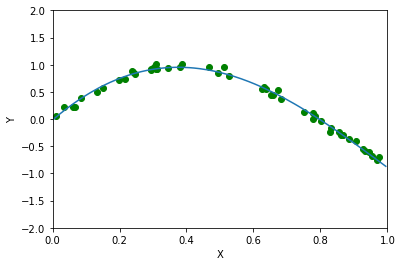

In [40]:
plot_predictions(df,model,4)

In [41]:
l2

0.0001

In [42]:
val=np.logspace(-4,15,num=10)
l2_penalty,l2,model=lasso_regression(df,2,val,df['Y'])

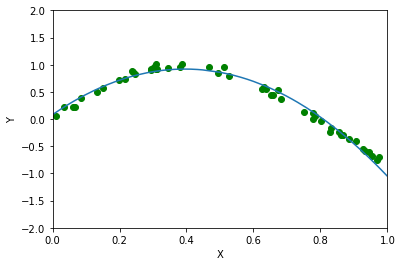

In [44]:
plot_predictions(df,model,2)

In [45]:
val=np.logspace(-4,15,num=10)
l2_penalty,l2,model=lasso_regression(df,128,val,df['Y'])

C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\coordinate_

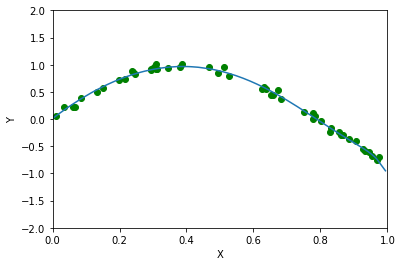

In [46]:
plot_predictions(df,model,128)

In [47]:
model.coef_

array([ 0.        ,  4.72772933, -5.29000605, -1.40821369, -0.        ,
        0.        ,  0.14498193,  0.70483335,  0.40431449,  0.11013934,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.07985323,
       -0.17212751, -0.11649772, -0.0546275 , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

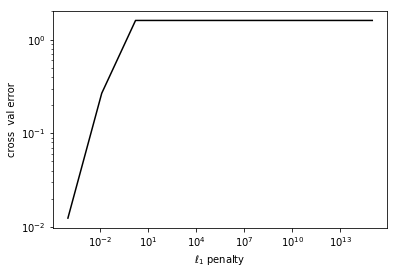

In [51]:
plt.plot(val,l2_penalty,'k-')
plt.xlabel('$\ell_1$ penalty')
plt.ylabel('cross  val error')
plt.xscale('log')
plt.yscale('log')